In [20]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [21]:
train_labels=[]
train_samples=[]

In [22]:
for i in range(50):
  random_younger=randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(1)

  random_older=randint(65,100)
  train_samples.append(random_older)
  train_labels.append(0)

for i in range(1000):
  random_younger=randint(13,64)
  train_samples.append(random_younger)
  train_labels.append(0)

  random_older=randint(65,100)
  train_samples.append(random_older)
  train_labels.append(1)

In [24]:
test_labels=[]
test_samples=[]

In [25]:
for i in range(10):
  random_younger=randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(1)

  random_older=randint(65,100)
  test_samples.append(random_older)
  test_labels.append(0)

for i in range(200):
  random_younger=randint(13,64)
  test_samples.append(random_younger)
  test_labels.append(0)

  random_older=randint(65,100)
  test_samples.append(random_older)
  test_labels.append(1)

In [ ]:
for i in train_samples:
  print(i)

In [36]:
test_labels=np.array(test_labels)
test_samples=np.array(test_samples)
test_labels,test_samples=shuffle(test_labels,test_samples)

In [37]:
train_labels=np.array(train_labels)
train_samples=np.array(train_samples)
train_labels,train_samples=shuffle(train_labels,train_samples)


In [38]:
scaler=MinMaxScaler(feature_range=(0,1))
scaler_test_samples=scaler.fit_transform(test_samples.reshape(-1,1))


In [39]:
scaler=MinMaxScaler(feature_range=(0,1))
scaler_train_samples=scaler.fit_transform(train_samples.reshape(-1,1))


In [ ]:
for i in scaler_train_samples:
  print(i)

In [30]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [31]:
model=Sequential([
                  Dense(units=16,input_shape=(1,),activation='relu'),
                  Dense(units=32,activation='relu'),
                  Dense(units=2,activation='softmax')
])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_5 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [33]:
model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(learning_rate=.0001),metrics=['accuracy'])

In [ ]:
model.fit(x=scaler_train_samples,y=train_labels,batch_size=10,epochs=30,validation_split=.2,shuffle=True,verbose=2)

In [41]:
predictions=model.predict(x=scaler_test_samples,batch_size=10,verbose=0)

In [ ]:
for i in predictions:
  print(i)

In [47]:
rounded_predictions=np.argmax(predictions,axis=-1)

In [48]:
rounded_predictions

array([1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,

In [51]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt


In [52]:
cm=confusion_matrix(y_true=test_labels,y_pred=rounded_predictions)

In [53]:
def plot_confusion_matrix(cm,classes,normalize=False,title='confusion_matrix',cmap=plt.cm.Blues):
  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks=np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print('Normalized confusion matrix')
  else:
    print("Confusion matrix, without normalization")
  print(cm)

  thresh=cm.max()/2
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,cm[i,j],horizontalalignment='center',color='white' if cm[i,j]>thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    


Confusion matrix, without normalization
[[187  23]
 [  9 201]]


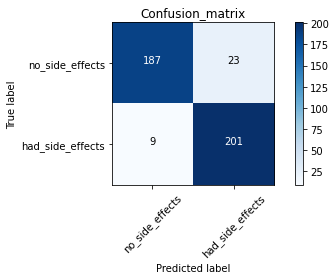

In [54]:
cm_plot_labels=['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm,classes=cm_plot_labels,title='Confusion_matrix')